In [ ]:
# Importing the Google Drive module to access files stored in Google Drive
from google.colab import drive

# Mounting the Google Drive to the specified directory ('/content/drive') 
# so that files from Google Drive can be accessed directly in this Colab environment
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Copy the compressed file 'images.rar' from the specified path in Google Drive 
# to the current working directory in the Colab environment
!cp /content/drive/MyDrive/images.rar /content/

In [ ]:
# Create a new directory named 'images' in the current working directory
!mkdir /content/images

# Extract the contents of the 'images.rar' file into the 'images' directory
# using the 'unrar' command-line tool
!unrar x /content/images.rar /content/images/

Streaming output truncated to the last 5000 lines.
Extracting  /content/Hand_Gestures/output/5/pp_r_f_lm00005.png            49%  OK 
Extracting  /content/Hand_Gestures/output/5/pp_r_f_lm00006.png            49%  OK 
Extracting  /content/Hand_Gestures/output/5/pp_r_f_lm00007.png            49%  OK 
Extracting  /content/Hand_Gestures/output/5/pp_r_f_lm00008.png            49%  OK 
Extracting  /content/Hand_Gestures/output/5/pp_r_f_lm00009.png            49%  OK 
Extracting  /content/Hand_Gestures/output/5/pp_r_f_lm00010.png            49%  OK 
Extracting  /content/Hand_Gestures/output/5/pp_r_f_lm00011.png            49%  OK 
Extracting  /content/Hand_Gestures/output/5/pp_r_f_lm00012.png            49%  OK 
Extracting  /content/Hand_Gestures/output/5/pp_r_f_lm00013.png            49%  OK 
Extracting  /content/Hand_Gestures/output/5/pp_r_f_lm00014.png            49%  OK 
Extracting  /content/Hand_Ges

In [ ]:
# %%
# Import necessary libraries for data manipulation, visualization, and deep learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D
from keras.models import Sequential, save_model
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import cv2

In [ ]:
# %%
# Define a label map for the dataset categories
label_map = {'1': 1, '2': 2, '3': 3, '4': 4, '5': 5}
print("Labels: ", label_map.keys())

Labels:  dict_keys(['1', '2', '3', '4', '5'])


In [ ]:
# %%
# Specify the path where the extracted images are stored
images_path = '/content/images/'

In [ ]:
# %%
# Initialize empty lists to store image data (x) and labels (y)
x, y = [], []

# Iterate over each category in the dataset
for category in range(1, 6):  # Assuming 5 categories labeled from 1 to 5
    scategory = str(category)
    cat_images_path = images_path + scategory + '/'  # Path to category folder
    for cat_single in os.listdir(cat_images_path):  # Iterate through all images in the category
        img_path = images_path + scategory + '/' + cat_single  # Full path to the image
        img = cv2.imread(img_path, 0)  # Read the image in grayscale
        img = img.reshape((224,224,1))  # Reshape image to 224x224 with 1 channel
        img = img / 255.0  # Normalize pixel values to range [0, 1]
        x.append(img)  # Append image data to x
        y.append(label_map[scategory])  # Append corresponding label to y



In [ ]:
# %%
# Convert image data and labels to NumPy arrays
X = np.array(x)
Y = np.array(y)

# One-hot encode the labels for categorical classification
Y = to_categorical(Y)

# Shuffle the dataset to ensure random distribution of data points
X, Y = shuffle(X, Y)

# Determine the number of categories (classes) based on the shape of Y
categories = Y.shape[1]


In [ ]:
# %%
# Print the shape of the image data and labels for verification
print(X.shape, Y.shape)

(50000, 224, 224, 1) (50000, 6)


In [ ]:
# %%
# Split the data into training/validation and test sets (80/20 split)
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Further split the training/validation set into training and validation sets (75/25 split)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.25, random_state=42)

# Print the sizes of the training, validation, and test sets
print("Training set size:", X_train.shape, Y_train.shape)
print("Validation set size:", X_val.shape, Y_val.shape)
print("Test set size:", X_test.shape, Y_test.shape)

Training set size: (30000, 224, 224, 1) (30000, 6)
Validation set size: (10000, 224, 224, 1) (10000, 6)
Test set size: (10000, 224, 224, 1) (10000, 6)


In [ ]:
# %%
# Import additional necessary layers for building the deep learning model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D

In [ ]:
# %%
# Define a Sequential Convolutional Neural Network (CNN) model
model = Sequential()

# Add the first convolutional layer with 32 filters, kernel size 5x5, and ReLU activation
model.add(Conv2D(32, kernel_size=(5,5), activation='relu', input_shape=(224,224,1)))

# Add a max-pooling layer to downsample the feature maps
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the second convolutional layer with 64 filters and kernel size 3x3
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the third convolutional layer with 128 filters
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the fourth convolutional layer with 256 filters
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a global average pooling layer to reduce the spatial dimensions
model.add(GlobalAveragePooling2D())

# Add a fully connected (dense) layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

# Add a dropout layer to reduce overfitting
model.add(Dropout(0.3))

# Add the output layer with the number of categories (softmax activation for multi-class classification)
model.add(Dense(categories, activation='softmax'))

# Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy metric
model.compile(optimizer='Adam', metrics=['accuracy'], loss='categorical_crossentropy')

# Display the model's architecture
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 220, 220, 32)        │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 108, 108, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 422,022 (1.61 MB)

 Trainable params: 422,022 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# %%
# Create a directory to save the model if it doesn't already exist
model_dir = "models"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Specify the path to save the best model
model_path = os.path.join(model_dir, "m1.keras")

# Define a checkpoint callback to save the best model based on validation loss
checkpoint_callback = ModelCheckpoint(
    model_path,
    save_best_only=True,  # Save only the model with the lowest validation loss
    save_weights_only=False,  # Save the entire model (not just weights)
    monitor='val_loss',  # Monitor validation loss
    verbose=1  # Print updates during training
)

In [ ]:
# %%
# Train the model using the training data, validating with the validation set
history = model.fit(
    X_train, Y_train,               # Training data and labels
    validation_data=(X_val, Y_val), # Validation data and labels
    epochs=1,                       # Number of training epochs (adjust as needed)
    callbacks=[checkpoint_callback],# Use the defined checkpoint callback
    batch_size=8,                   # Batch size for training
    verbose=1                       # Display training progress
)

In [ ]:
# %%
# Load the best saved model from the specified path
best_model = load_model(model_path)

# Evaluate the best model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test, Y_test, verbose=1)
print(f"Test Loss: {test_loss}")        # Print the test loss
print(f"Test Accuracy: {test_accuracy}")  # Print the test accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - accuracy: 0.9967 - loss: 0.0137
Test Loss: 0.010239727795124054
Test Accuracy: 0.9975000023841858


313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step


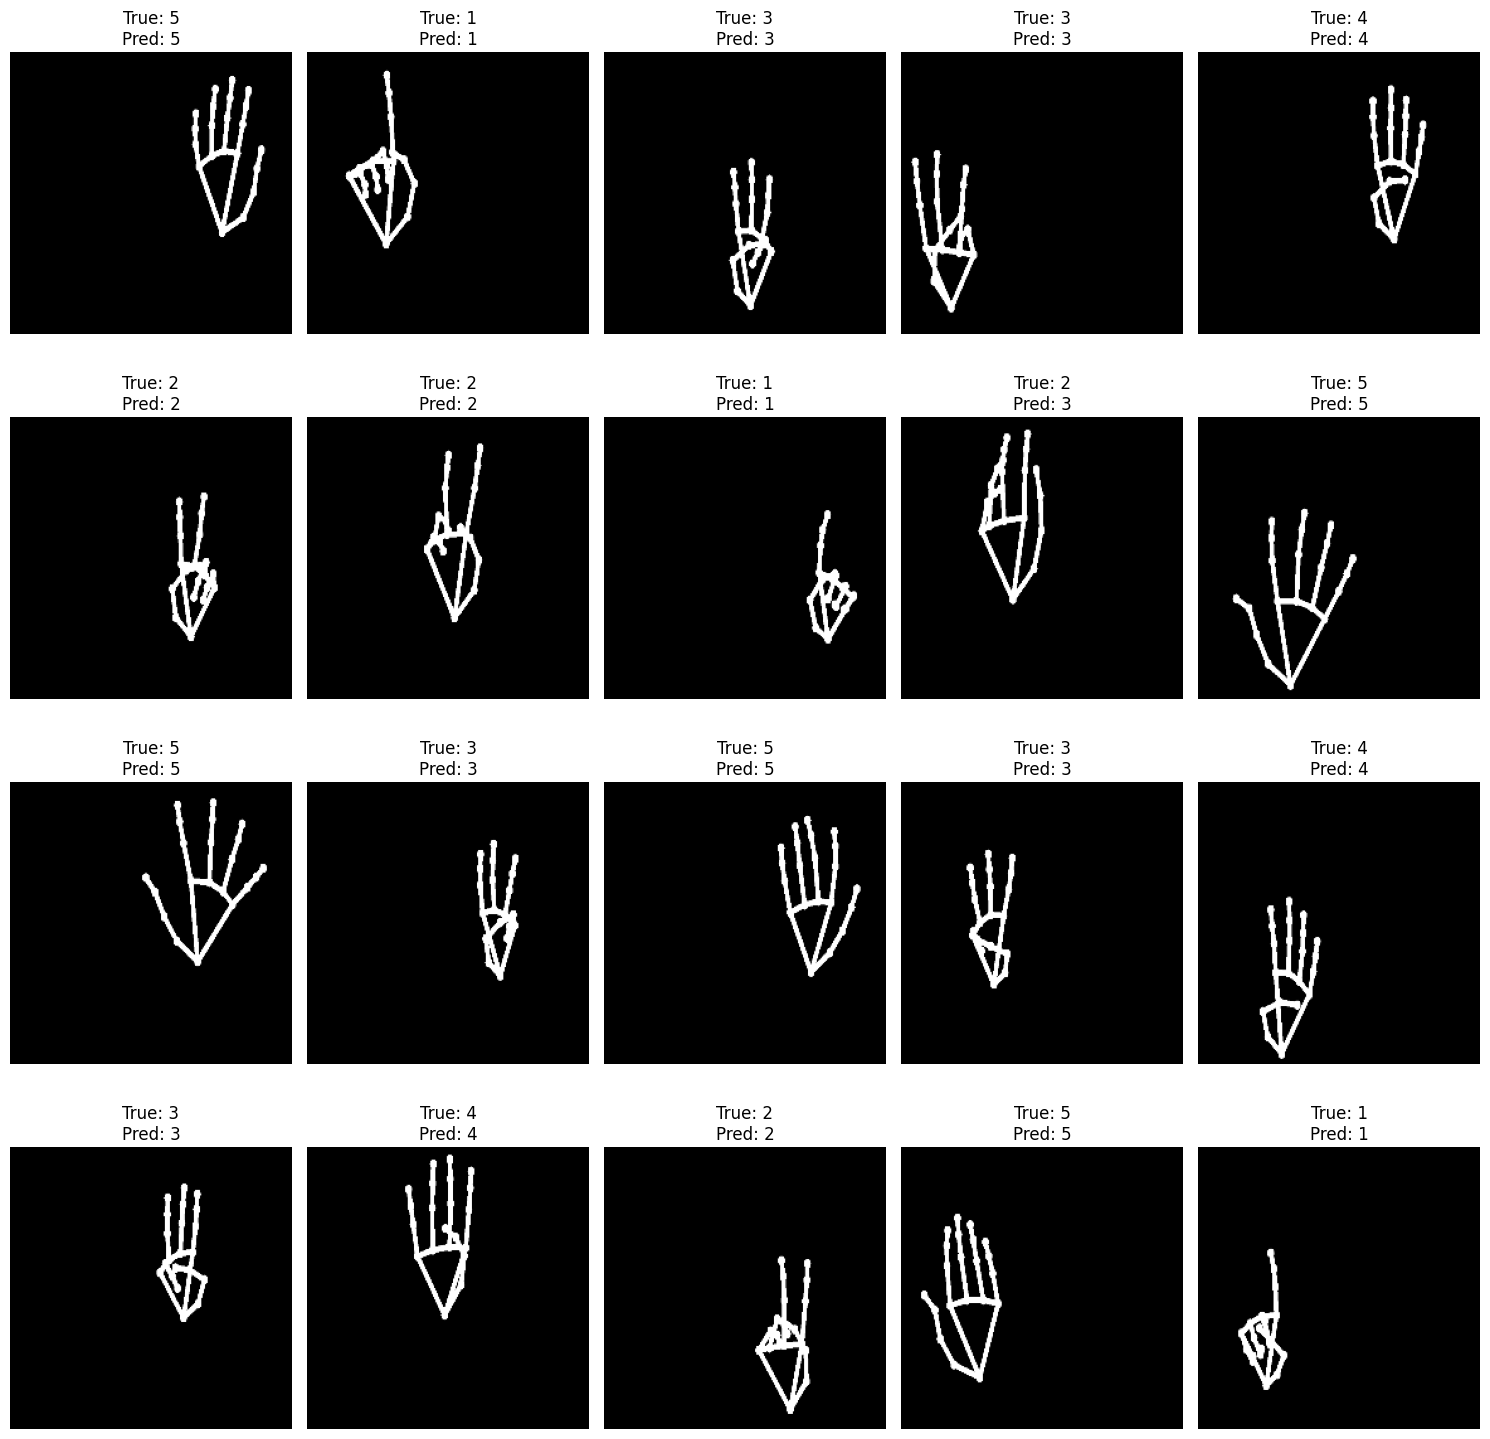

In [ ]:
# %%
# Generate predictions using the best model on the test set
predictions = best_model.predict(X_test)

# Determine the predicted class for each test sample
predicted_classes = np.argmax(predictions, axis=1)

# Get the true class labels for the test samples
true_classes = np.argmax(Y_test, axis=1)

# Visualize some test samples along with their true and predicted labels
num_samples = 20  # Number of samples to visualize
num_cols = 5      # Number of columns in the plot grid
num_rows = math.ceil(num_samples / num_cols)  # Calculate the number of rows needed

plt.figure(figsize=(15, 15))  # Set the figure size
for i in range(num_samples):
    plt.subplot(num_rows, num_cols, i + 1)  # Create a subplot for each sample
    plt.imshow(X_test[i].reshape(224, 224), cmap='gray')  # Display the image
    plt.axis('off')  # Hide the axis
    plt.title(f"True: {true_classes[i]}\nPred: {predicted_classes[i]}")  # Add title with true and predicted labels
plt.tight_layout()  # Adjust layout for better visualization
plt.show()  # Display the plot